# Titanic ［分类任务］

In [2]:
# -*- coding: utf-8 -*-
# Imports

# numpy & pandas
import numpy as np
import pandas as pd 
from pandas import Series,DataFrame

# matplotlib,seaborn
import matplotlib.pyplot as plt
import seaborn as sns
    #sns.set_style("")  darkgrid, whitegrid, dark, white, and ticks
%matplotlib inline  
#如果不写这句话，图像出不来   ipython魔法命令
#使用%matplotlib命令可以将matplotlib的图表直接嵌入到Notebook之中，或者使用指定的界面库显示图表，
#它有一个参数指定matplotlib图表的显示方式。

#inline表示将图表嵌入到Notebook中,所创建的图表将直接显示在该单元之下。

#ipython 魔法命令 IPython提供了许多魔法命令，使得在IPython环境中的操作更加得心应手。
#魔法命令都以%或者%%开头，以%开头的成为行命令，%%开头的称为单元命令。
#行命令只对命令所在的行有效，而单元命令则必须出现在单元的第一行，对整个单元的代码进行处理。


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

    

In [3]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("/Users/emily/Desktop/kaggle项目/Titanic/data/train.csv",dtype={"Age":np.float64,"Embarked" :np.string_},header=0,)
test_df = pd.read_csv("/Users/emily/Desktop/kaggle项目/Titanic/data/test.csv",dtype={"Age":np.float64},header=0,)

# preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

In [5]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df    = test_df.drop(['Name','Ticket'], axis=1)
titanic_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


## 数据预处理：
逐一对变量进行缺失值处理，并画图探究异常值，并探究分布特点

### 变量Embarked －类别型变量

In [6]:
# show embarked's descriptive information
titanic_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

DataFrame的汇总统计描述［pandas包］
DataFrame.describe()返回非NA的数量、unique数量、most common和most common所占的频率
可知most common值为S。
#from sklearn.preprocessing import Imputer
#imp = Imputer(strategy='most_frequent',copy=False)
#imp.fit(titanic_df['Embarked'][titanic_df['Embarked'].notnull()])
用sklearn实现时，会出现格式不匹配的问题，待研究
df.info()返回数据框的数据类型信息和计数
df.describe()返回汇总和描述统计信息，针对数值型数据与非数值型数据返回的汇总统计信息不同。
dataframe.info()与dataframe.describe()实现不同的功能，不能混为一谈

In [7]:
X = titanic_df[titanic_df['Embarked']=='C'] #pandas下的dataframe可直接实现指定数据的特定
X[X['Survived']==1].count()/X.count()
#经过验证，factorplot是针对x变量的每个取值，分别统计y＝1时所占的比例
#适用于x多变量，y仅是二元变量的情况

Survived    0.553571
Pclass      0.553571
Sex         0.553571
Age         0.607692
SibSp       0.553571
Parch       0.553571
Fare        0.553571
Cabin       0.753623
Embarked    0.553571
dtype: float64

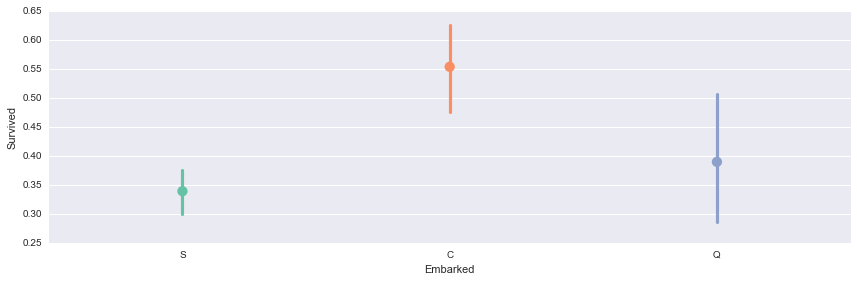

In [8]:
# there are only two missing value in titanic_df, fill the two missing value with the most occurred value
titanic_df['Embarked'] = titanic_df['Embarked'].fillna("S")

# plot 
sns.factorplot(x='Embarked',y='Survived',data=titanic_df,size=4,aspect=3,kind='point',palette='Set2')

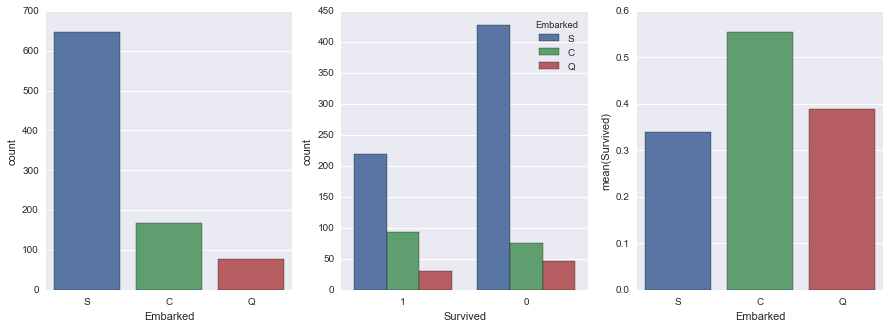

In [9]:
# plot
fig , (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Embarked',data=titanic_df,ax=axis1)#单变量分布
sns.countplot(x='Survived',hue='Embarked',data=titanic_df,ax=axis2,order=[1,0])  
# countplot总结：y始终是计数值，hue表示第二级分类变量，order表示x的在横坐标上的输出顺序 ax用于指示图形句柄

#group by Embarked , and get the mean value for survived passengers for each value in Embarked

embark_perc = titanic_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()#分组后计算组内均值
sns.barplot(x='Embarked',y='Survived',data=embark_perc,order=['S','C','Q'],ax=axis3)

#注意：dataframe多个列索引，必须将列名以列表的形式输入到索引中，因此需要两对中括号
#即 dataframe的索引中接受一个列名的列表
#pandas包中的groupby方法可直接实现分组

虚拟变量 ( Dummy Variables) 又称虚设变量、名义变量或哑变量，用以反映质的属性的一个人工变量，是量化了的自变量，通常取值为0或1。引入哑变量可使线形回归模型变得更复杂，但对问题描述更简明，一个方程能达到两个方程的作用，而且接近现实。反映文化程度的虚拟变量可取为：1:本科学历；0：非本科学历。原来具有n个取值的类别型变量变成了n个独立的变量，0表示无，1表示有
即对类别型变量进行矢量化

类别型变量的处理：有序－连续化（用k个有大小的数来表示）
               无序－矢量化／向量化（用k维向量表示），每个取值占一列

Embarked变量可进行两种处理：
1、直接舍弃，逻辑上对预测没有作用
2、用于预测，前提是为Embarked赋予哑变量（Dummy Variables),并且删掉了s值，不明白这里的道理！

In [10]:
#第一种处理方式
embark_dummies_titanic = pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.drop(['S'],axis=1,inplace=True)
embark_dummies_test = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'],axis=1,inplace=True)

titanic_df = titanic_df.join(embark_dummies_titanic)
test_df    = test_df.join(embark_dummies_test)

titanic_df.head()
test_df.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,C,Q
0,892,3,male,34.5,0,0,7.8292,NaN,Q,0.0,1.0
1,893,3,female,47.0,1,0,7.0000,NaN,S,0.0,0.0
2,894,2,male,62.0,0,0,9.6875,NaN,Q,0.0,1.0
3,895,3,male,27.0,0,0,8.6625,NaN,S,0.0,0.0
4,896,3,female,22.0,1,1,12.2875,NaN,S,0.0,0.0


inplace=True时，会直接修改本地的数据，想要再恢复之前的数据就很难了。

In [11]:
# 第二种处理方式
titanic_df.drop(['Embarked'],axis=1,inplace=True)
test_df.drop(['Embarked'],axis=1,inplace=True)

titanic_df.info()
print("-------------------")
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
C           891 non-null float64
Q           891 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 69.7+ KB
-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Cabin          91 non-null object
C              418 non-null float64
Q              418 non-null float64
dtypes: float64(4), int64(4), object(2

### 变量Fare－数量型变量

In [12]:
# show Fare's descriptive information
titanic_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [13]:
test_df['Fare'].describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%             NaN
50%             NaN
75%             NaN
max      512.329200
Name: Fare, dtype: float64

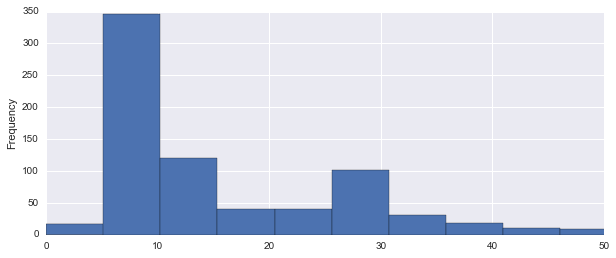

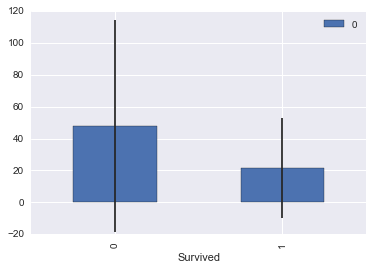

In [14]:
# there is only one missing "Fare" value in test
test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True)

# convert dtype from float64 to int
titanic_df['Fare']=titanic_df['Fare'].astype(int)
test_df['Fare']=test_df['Fare'].astype(int)

# get fare for survive &didn't survive passengers  注意下面这种dataframe的索引方式
Fare_survived = titanic_df['Fare'][titanic_df['Survived']==1]
Fare_not_survived = titanic_df['Fare'][titanic_df['Survived']==0]

# get average and std for fare for survived/not survived passengers
average_fare=DataFrame([Fare_survived.mean(),Fare_not_survived.mean()])
std_fare=DataFrame([Fare_survived.std(),Fare_not_survived.std()])

#plot hist for fare
titanic_df['Fare'].plot(kind='hist',figsize=(10,4),bins=100,xlim=(0,50)) 
   # xlim规定了横坐标的宽度，bins/xlim的最大值，表示一个格子中的分类数
average_fare.index.names=std_fare.index.names=['Survived']
average_fare.plot(yerr=std_fare,kind='bar',legend=True) 
   # x.plot(yerr=y,kind='')  

titanic_df.info()与print()语句，作用的结果是直接打印输出，没有返回值，因而其结果不作为out[];
titanic_df.describe(),其计算的结果会以返回值输出，因而结果前面有out[]
titanic_df['Fare'].info() 与test_df['Fare'].info()均没有输出，原因是info()方法只作用在DataFrame上。

由之前的分析知，训练集中Fare变量没有缺失值，测试机中Fare变量有1个缺失值，要对训练集中的Fare变量进行缺失值处理。

结果显示fare变量对因变量有很大影响

比较下面两种DataFrame的索引方式
titanic_df['Age'][titanic_df['Survived']==0]   有条件索引列，只获取这两列满足条件的rows
titanic_df[['Age','Survived']]  无条件直接索引，获得这两列的全部rows

### 变量age

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


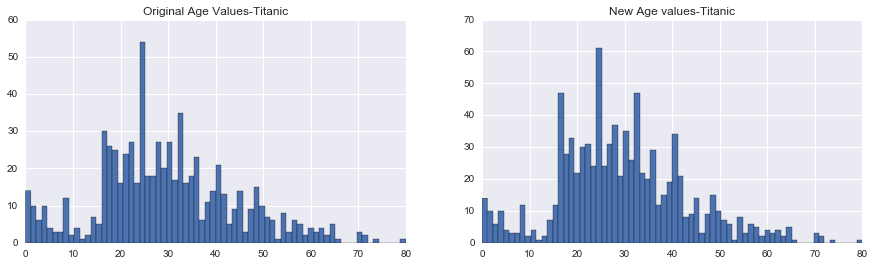

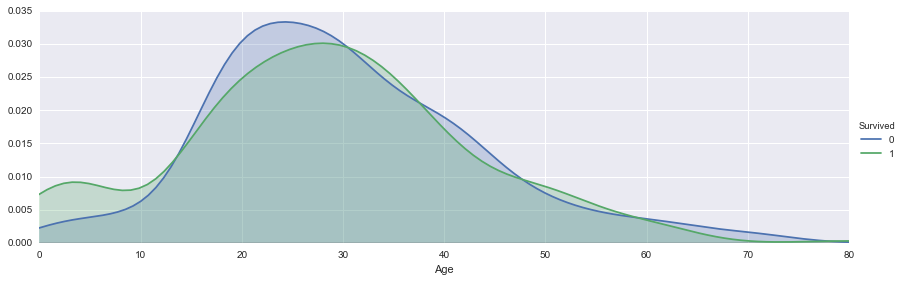

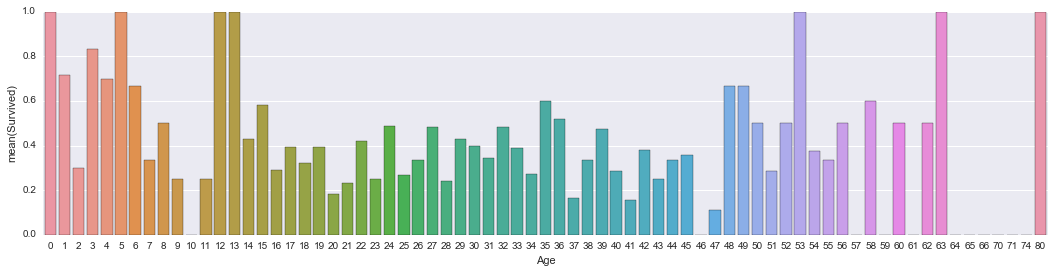

In [15]:
# age变量在训练集和测试集中均存在缺失，原策略采用在（均值－方差）和（均值＋方差）之间进行随机采样，
# 可考虑一下采用随机抽样原始分布的方法，对缺失值进行填充

# plot original and new Age values in axis1 & axis2
fig, (axis1,axis2)=plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age Values-Titanic')
axis2.set_title('New Age values-Titanic')

titanic_df['Age'].dropna().astype(int).hist(bins=70,ax=axis1) #画原始数据图的语句

# get average,std,and number of NaN in titanic values
average_age_titanic = titanic_df['Age'].mean()
std_age_titanic = titanic_df['Age'].std()
count_nan_age_titanic = titanic_df['Age'].isnull().sum() # isnull()是一个方法，返回一个true false列表，sum可直接对逻辑变量计数

# get average,std,and number of NaN is test values
average_age_test = test_df['Age'].mean()
std_age_test = test_df['Age'].std()
count_nan_age_test = test_df['Age'].isnull().sum()

# generate random numbers between (mean-std) & (mean+std)    
# np.random.randint(min,max,size)  size是随机采样的个数
rand_1=np.random.randint(average_age_titanic-std_age_titanic,average_age_titanic+std_age_titanic,size=count_nan_age_titanic)
rand_2=np.random.randint(average_age_test-std_age_test,average_age_test+std_age_test,size=count_nan_age_test)

# fill NaN values in Age column with random values generated
titanic_df['Age'][np.isnan(titanic_df['Age'])]=rand_1
test_df['Age'][np.isnan(test_df['Age'])]=rand_2 #np.isnan()是一个函数，返回值为空的序号

#convert new Age values from float to int
titanic_df['Age']=titanic_df['Age'].astype(int)
test_df['Age']=test_df['Age'].astype(int)

# plot new Age values
titanic_df['Age'].hist(bins=70,ax=axis2) #画新生成的数据的语句

# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_df,hue='Survived',size=4,aspect=3) #构造绘图句柄，参数为：数据，hue，图形尺寸
facet.map(sns.kdeplot,'Age',shade=True)  #绘制核密度图kedplot 参数shade设置为true
facet.set(xlim=(0,titanic_df['Age'].max())) #设置图像的横坐标范围
facet.add_legend()  #添加图例

# average survived passengers by age
fig ,axis1=plt.subplots(1,1,figsize=(18,4))  #subplots中的s总是被忽略掉，已经出错两次
average_age = titanic_df[['Age','Survived']].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age',y='Survived',data=average_age)

### 变量Cabin

In [16]:
# cabin变量具有的缺失值非常多，因此直接舍弃此属性
titanic_df.drop('Cabin',axis=1,inplace=True)
test_df.drop('Cabin',axis=1,inplace=True)

### 变量Family－类别型变量

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


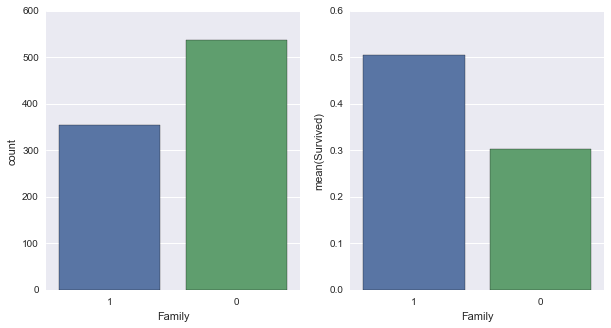

In [17]:
# 原始数据有两列属性 Parch & SibSp，本策略将这两个属性合为一个，认为只要有亲人在岸，就会增加获救的几率

# df.loc[index list,colums list]用于提取数据 注意loc不是方法，后面要用中括号
titanic_df['Family'] =  titanic_df["Parch"] + titanic_df["SibSp"]  # 两列可以直接进行算数运算的前提条件是，数据类型均为数值型
titanic_df['Family'].loc[titanic_df['Family']>0]=1;
titanic_df['Family'].loc[titanic_df['Family']==0]=0;

test_df['Family'] =  test_df["Parch"] + titanic_df["SibSp"]
test_df['Family'].loc[test_df['Family']>0]=1;
test_df['Family'].loc[test_df['Family']==0]=0;

# drop Parch and SibSp 
titanic_df = titanic_df.drop(['Parch','SibSp'],axis=1)
test_df = test_df.drop(['Parch','SibSp'],axis=1)

# plot two figures, first to show how count value by family (0/1),second to show the mean survived value by family (0/1)
fig ,(axis1,axis2) = plt.subplots(1,2,figsize=(10,5),sharex=True) # 新参数sharex 两图具有相同的x坐标轴
axis1.set_xticklabels(["With Family","Alone"], rotation=0)
sns.countplot(x='Family',data=titanic_df,order=[1,0],ax=axis1)

family_perc = titanic_df[['Family','Survived']].groupby(['Family'],as_index=False).mean() #参数as_index总是被忘记
sns.barplot(x='Family',y='Survived',data=family_perc,order=[1,0],ax=axis2) #ax总是忘记写
 


### sex变量

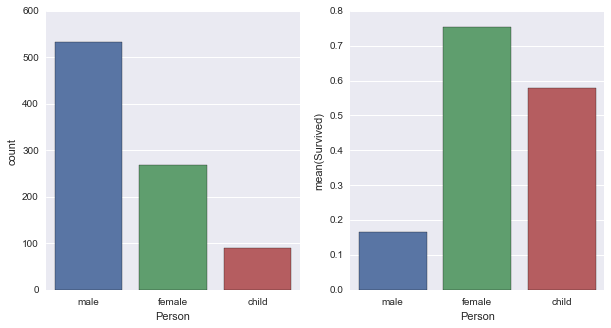

In [18]:
#原始数据中sex只有两个分类男和女，由于孩子的特殊性，即孩子不区分男女，因而最好的方式是单独在sex下为孩子设立一个独立变量。即分为男人、女人和孩子

# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child 
# 新分类的结果作为person属性，最后对person属性进行哑变量变换

def get_person(passenger):
    age,sex=passenger
    return 'child' if age < 16 else sex

titanic_df['Person']=titanic_df[['Age','Sex']].apply(get_person,axis=1)
test_df['Person']=test_df[['Age','Sex']].apply(get_person,axis=1)

# no need to use Sex column since we generate the Person
titanic_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)

# create dummy variables for Person column
person_dummies_titanic = pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']  # 对属性命名

person_dummies_test  = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Child','Female','Male']

# drop male as it has the lowest average of survived passengers
person_dummies_titanic.drop(['Male'],axis=1,inplace=True)
person_dummies_test.drop(['Male'], axis=1, inplace=True)
                         
# join the new dummy variables to the original datasets
test_df = test_df.join(person_dummies_test)
titanic_df = titanic_df.join(person_dummies_titanic)
                         
# plot two figures to show the count and average number for each person style
fig ,(axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='Person',data=titanic_df,ax=axis1)
person_perc = titanic_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

# after plot all the fiugres  no need to use Person columns any more，因为已经对person变量矢量化了
titanic_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)
                         


### pclass变量－类别型变量

In [19]:
titanic_df['Pclass'].describe() #此处describe方法并没有判断出数据为类别型变量，因而给出了连续型变量的统计分布

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

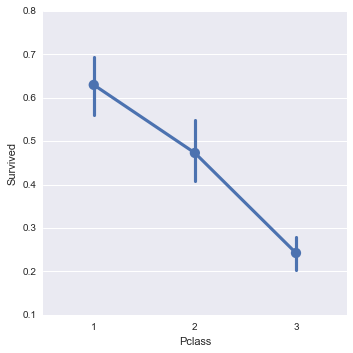

In [20]:
# no missing values 
# plot 
sns.factorplot('Pclass','Survived',data=titanic_df,order=[1,2,3],size=5)

图示：Pclass=1，2，3时survived人数所占的比例。
factorplot是探求类别型变量x的各个取值与y的关系。

In [21]:
# create dummy variables for Pclass column  in both titanic_df and test_df
pclass_dummies_titanic = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.columns=['Class1','Class2','Class3']

pclass_dummies_test = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns=['Class1','Class2','Class3']

# drop pclass columns
titanic_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True) 

# join new variables in original datasets
titanic_df=titanic_df.join(pclass_dummies_titanic)
test_df=test_df.join(pclass_dummies_titanic)

## 数据预处理的结果

In [22]:
# show current data
titanic_df.info()
titanic_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Age         891 non-null int64
Fare        891 non-null int64
C           891 non-null float64
Q           891 non-null float64
Family      891 non-null int64
Child       891 non-null float64
Female      891 non-null float64
Class1      891 non-null float64
Class2      891 non-null float64
Class3      891 non-null float64
dtypes: float64(7), int64(4)
memory usage: 76.6 KB


,Survived,Age,Fare,C,Q,Family,Child,Female,Class1,Class2,Class3
0,0,22,7,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0
1,1,38,71,1.0,0.0,1,0.0,1.0,1.0,0.0,0.0
2,1,26,7,0.0,0.0,0,0.0,1.0,0.0,0.0,1.0
3,1,35,53,0.0,0.0,1,0.0,1.0,1.0,0.0,0.0
4,0,35,8,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0


In [23]:
test_df.info()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Age            418 non-null int64
Fare           418 non-null int64
C              418 non-null float64
Q              418 non-null float64
Family         418 non-null float64
Child          418 non-null float64
Female         418 non-null float64
Class1         418 non-null float64
Class2         418 non-null float64
Class3         418 non-null float64
dtypes: float64(8), int64(3)
memory usage: 36.0 KB


,PassengerId,Age,Fare,C,Q,Family,Child,Female,Class1,Class2,Class3
0,892,34,7,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,893,47,7,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,894,62,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,895,27,8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,896,22,12,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


至此 所有的预处理工作已经完成，终于获得可以直接输入到机器学习模型中的数据了。

## 数据挖掘模型

本策略中以下各算法均没有实现其最大的价值，为考量各模型的参数，也没有进行交叉验证。下一步可通过调整模型的参数优化拟合效果。

In [24]:
# data training and testing sets
X_train = titanic_df.drop(['Survived'],axis=1)
Y_train = titanic_df['Survived']
X_test  = test_df.drop(['PassengerId'],axis=1).copy()
    #必须标注drop的轴，否则默认删除数据中的行

### 逻辑回归/对数几率回归（分类器） 隶属于线性模型 

In [79]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
logreg.score(X_train,Y_train)

0.80246913580246915

mmodel.score(X_train,Y_train),score方法用于评估模型的拟合效果，实际上得到的是对训练集的拟合效果，与测试机无关，也与模型的泛化性能无关。

NumPy不能用info()方法， 可以转换为DataFrame()

In [80]:
logreg.get_params() #返回模型参数
logreg.predict_proba(X_test)  #以列表返回每个样本的预测分类概率，即此样本属于不同类别的概率
logreg.predict_log_proba(X_test)  #以列表返回每个样本的预测分类对数概率，即此样本属于不同类别的概率
logreg.decision_function(X_test)  #不知道是什么？？？


array([-2.50744763,  1.82024078, -2.83463418, -0.59526387,  0.17425133,
       -0.32024524,  2.68021081, -2.68613839,  1.06453279, -1.34255913,
       -2.7153305 , -0.74527669,  0.38798768, -3.38500851, -0.07429048,
        2.2125112 , -2.52394747, -0.53331975,  0.07764958,  0.55557558,
       -1.14978447,  0.82318319,  0.47711501,  0.16030222,  0.41921539,
       -3.14559605,  0.81483549,  0.11606743, -2.76874156, -1.96691959,
       -0.82067775, -0.52790115, -0.02934093,  1.05409526, -0.01123051,
        0.1914685 ,  0.22124961,  0.39090201, -2.67668979, -2.78654773,
       -2.32116314, -1.68092376, -2.77955348,  1.27559763, -0.0408207 ,
       -2.47794921, -2.4267434 , -2.36431768,  0.10557661, -0.08824215,
       -2.63386526, -1.89433902,  2.33671933,  1.4308191 ,  0.41376018,
        2.02430803, -1.41477354, -2.47794921, -1.572523  ,  0.6454186 ,
       -2.32714708, -0.48748404, -0.42608155,  0.51173565,  2.35500207,
        0.25388316,  2.03849581, -2.87620215, -2.16330975, -0.42

In [81]:
logreg.coef_ # 逻辑回归模型的系数，即各个属性所对应的系数
#logreg.intercept_ 
#logreg.n_iter_

array([[ -1.88502669e-02,   4.70083772e-04,   6.17550055e-01,
          3.39834738e-01,  -1.99680748e-01,   1.94941087e+00,
          2.79298008e+00,   7.74282037e-01,  -9.36361603e-02,
         -1.34531450e+00]])

In [82]:
# 返回数据集的属性名
titanic_df.columns  
# 返回逻辑回归模型的系数
logreg.coef_[0]   #与logreg.coef_的效果一样  待探究

array([ -1.88502669e-02,   4.70083772e-04,   6.17550055e-01,
         3.39834738e-01,  -1.99680748e-01,   1.94941087e+00,
         2.79298008e+00,   7.74282037e-01,  -9.36361603e-02,
        -1.34531450e+00])

In [83]:
# show the parameters for Logistic Regression model
coeff_df = DataFrame(titanic_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df['Coefficient Estimate'] = pd.Series(logreg.coef_[0])

coeff_df

,Features,Coefficient Estimate
0,Age,-0.018850
1,Fare,0.000470
2,C,0.617550
3,Q,0.339835
4,Family,-0.199681
5,Child,1.949411
6,Female,2.792980
7,Class1,0.774282
8,Class2,-0.093636
9,Class3,-1.345315


In [84]:
# save the Logistic Regression model's prediction outcome
submission = pd.DataFrame({
        "PassengerId": test_df['PassengerId'],
        "Survived"   : Y_pred
    })
submission.to_csv('/Users/emily/Desktop/kaggle项目/Titanic/data/submission.csv',index=False)

### 支持向量机  以下对四种不同的核函数进行了比较（Linear、RBF、Poly、Sigmoid）

sklearn提供的支持向量机：
分类：
svm.SVC([C, kernel, degree, gamma, coef0, ...])	C-Support Vector Classification.
svm.LinearSVC([penalty, loss, dual, tol, C, ...])	Linear Support Vector Classification.
svm.NuSVC([nu, kernel, degree, gamma, ...])	Nu-Support Vector Classification.
NuSVC与SVC类似，只不过SVC用C作为惩罚系数，NuSVC用Nu作为惩罚系数，二者都可以使用不同的核函数
LinearSVC不接受核函数的设置，只能实现线性核，
LinearSVC常用于作为对小样本数据分类的初次尝试算法，若效果不好则尝试其他模型
SGDClassifier常用于作为大样本数据分类的初次尝试算法，若效果不好则尝试其他模型
回归：
svm.SVR([kernel, degree, gamma, coef0, tol, ...])	Epsilon-Support Vector Regression.
svm.LinearSVR([epsilon, tol, C, loss, ...])	Linear Support Vector Regression.
svm.NuSVR([nu, C, kernel, degree, gamma, ...])	Nu Support Vector Regression.
非监督算法：
svm.OneClassSVM([kernel, degree, gamma, ...])	Unsupervised Outlier Detection.异常点监测
svm.l1_min_c(X, y[, loss, fit_intercept, ...])	
Return the lowest bound for C such that for C in (l1_min_C, infinity) the model is guaranteed not to be empty.

以下对svm.SVC的四种不同的核函数进行了比较（Linear、RBF、Poly、Sigmoid）

In [87]:
# Support Vector Machine - SVC(Linear Kernel)
# Linear Kernel核函数没有可选参数
from time import time
start = time()
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import uniform
from operator import itemgetter #

def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")
             
svc = SVC(kernel='linear')
[min,max]=[0,1] 
rv = uniform(min,max)  # 构造一个0-1的均匀分布
param_dist = {"C":rv}  # 待分析参数的分布，此处不能将rv替换成[rv]，否则会报错
random_search=RandomizedSearchCV(svc,param_distributions=param_dist,n_iter=20)
random_search.fit(X_train,Y_train)
#svc.fit(X_train,Y_train)
#Y_pred = svc.predict(X_test)
#svc.score(X_train,Y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), 20))
report(random_search.grid_scores_)

RandomizedSearchCV took 29.06 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.785 (std: 0.015)
Parameters: {'C': 0.97126053367193688}

Model with rank: 2
Mean validation score: 0.785 (std: 0.015)
Parameters: {'C': 0.69641687147435694}

Model with rank: 3
Mean validation score: 0.785 (std: 0.015)
Parameters: {'C': 0.75657948966144417}



对list或dict进行排序的方法：
方法1.用List的成员函数sort进行排序，在本地进行排序，不返回副本
方法2.用built-in函数sorted进行排序，返回副本，原始输入不变
sorted(iterable, cmp=None, key=None, reverse=False) --> new sorted list
L.sort(cmp=None, key=None, reverse=False) -- stable sort *IN PLACE*;

参数与返回值说明：
iterable：是可迭代类型;
cmp：用于比较的函数，比较什么由key决定;
key：用列表元素的某个属性或函数进行作为关键字，有默认值，迭代集合中的一项;按照key的值的大小进行排序
reverse：排序规则. reverse = True  降序 或者 reverse = False 升序，有默认值。
返回值：是一个经过排序的可迭代类型，与iterable一样。


from sklearn import preprocessing
X_train_n = preprocessing.scale(X_train)
X_test_n = preprocessing.scale(X_test)
Y_train_n = preprocessing.scale(Y_train)

svc_best = SVC(kernel='linear',C=0.75540763192273763)
svc_best.fit(X_train_n,Y_train_n)
Y_pred = svc_best.predict(X_test_n)
model.score(X_train_n,Y_train_N)
上述代码是对所有属性的分布进行标准化处理，令各属性变量服从均值为0，方差为1的标准正态分布。
但是，失败了。
失败原因：没有意识到只有连续的属性变量才能够进行标准化处理。

关于分类结果的可视化
注意：能够对分类结果进行可视化，需要判断属性变量的个数。能否可视化仅跟属性变量个数有关，与样本数和分类数均无关。
     属性数＝2  可绘制2维图
     属性数＝3  可绘制3维图
     属性数>=4  难以进行可视化
sklearn给了很多可视化的例子，可以参照例子自己画一下
可视化的原理：在decision_function遍历图上的每一个点，遍历结果存储起来，作为contour中的Z参数。

In [90]:
# Support Vector Machine - SVC(RBF Kernel)
# RBF kernel 的可选参数 包括gamma(默认为auto，n_属性的倒数)
from time import time
start = time()
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import uniform
from operator import itemgetter

def report(grid_scores,n_top=3):
    top_scores = sorted(grid_scores , key = itemgetter(1) , reverse = True)[:n_top]
    for i,score in enumerate(top_scores):
        print("Model with rank : {0}".format(i+1))
        print("Mean validation score : {0:.3f} (std:{1:.3f})".format(score.mean_validation_score,np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")
        
svc_rbf = SVC(kernel='rbf') #其他参数：gamma、C 
[min,max]=[0,1] 
rv_1 = uniform(min,max)
param_dist_1 = {"C":rv_1}
random_search_1 = RandomizedSearchCV(svc_rbf,param_distributions = param_dist_1 , n_iter =100)
random_search_1.fit(X_train,Y_train)
print("RandomizedSeachCV takes %.2f seconds for %d candidates"
     " parameter settings." % ((time()-start),100))
report(random_search_1.grid_scores_)

RandomizedSeachCV takes 5.31 seconds for 100 candidates parameter settings.
Model with rank : 1
Mean validation score : 0.676 (std:0.025)
Parameters: {'C': 0.93472302168874843}

Model with rank : 2
Mean validation score : 0.675 (std:0.025)
Parameters: {'C': 0.93267143256470453}

Model with rank : 3
Mean validation score : 0.675 (std:0.022)
Parameters: {'C': 0.91215931310368104}



In [ ]:
svc_poly=SVC(kernel='poly') 
random = svc_poly.fit(X_train,Y_train)
svc_poly.score(X_train,Y_train)

In [ ]:
# Support Vector Machine - SVC(Poly Kernel)----太慢了，不知道可以适用于什么情况f
# poly kernel 的可选参数 包括degree(d，默认为3),gamma(默认为auto，n_属性的倒数),coef0(r,默认为0.0)
from time import time 
from operator import itemgetter
from scipy.stats import uniform
from sklearn.grid_search import RandomizedSearchCV

def report(grid_scores,n_top=3):
    top_scores = sorted(grid_scores, key = itemgetter(1), reverse=True)[:n_top]
    for i,score in enumerate(top_scores):
        print("Model with rank : {0}".format(i+1))
        print("Mean validation score :{0:3f},(std:{1:.3f})".format(score.mean_validation_score,np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        
start = time()
rv_2 = uniform(0,1)
param_dict_2 = {"C":rv_2}
svc_poly = SVC(kernel='poly')
random_search_2=RandomizedSearchCV(svc_poly,param_distributions = param_dict_2,n_iter=1)
random_search_2.fit(X_train,Y_train)

print("RandomizedSearchCV takes %.2f seconds for %d candidates parameter settings." %((time()-start),1))
report(random_search_2.grid_scores_)

In [ ]:
svc_sigmoid=SVC(kernel='sigmoid')
random = svc_sigmoid.fit(X_train,Y_train)
svc_sigmoid.score(X_train,Y_train)

In [ ]:
# Support Vector Machine - SVC(Sigmoid Kernel)  计算速度非常快
# Sigmoid Kernel 的可选参数包括gamma(默认为auto，n_属性的倒数),coef0(r,默认为0.0)
from time import time
from operator import itemgetter
from scipy.stats import uniform
from sklearn.grid_search import RandomizedSearchCV

def report(grid_scores,n_top=3):
    top_scores = sorted(grid_scores,key=itemgetter(1),reverse= True)[:3]
    for i,score in enumerate(top_scores):
        print("Model with rank : {0}".format(i+1))
        print("Mean validation score: {0:3f},(std:{1:3f})".format(
            score.mean_validation_score,
            np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))

start = time()
rv_3 = uniform(0,1)
param_dict_3 ={"C":rv_3}
svc_sigmoid= SVC(kernel='sigmoid')
random_search_3=RandomizedSearchCV(svc_sigmoid,param_distributions= param_dict_3,n_iter=20)
random_search_3.fit(X_train,Y_train)

print("RandomizedSearchCV takes %.2f seconds for %d candidates parameter settings."%((time()-start),20))
report(random_search_3.grid_scores_)

## KNeighborsClassifier K邻近模型


In [88]:
# KNeighborsClassifier
# KNeighborsClassifier的可选参数包括algorithm('brute','kd_tree','ball_tree')
# n_neighbors(默认为5),  p(1，2，任意值,默认为2，距离计算公式)，weights('uniform','distance' 权重)
from sklearn.grid_search import GridSearchCV
from time import time
from operator import itemgetter

def report(grid_scores,n_top=10):
    top_scores = sorted(grid_scores,key=itemgetter(1),reverse = True)[:n_top]
    for i,score in enumerate(top_scores):
        print("Model with rank : {0}".format(i+1))
        print("Mean validation score: {0:3f},(std:{1:3f})".format(
            score.mean_validation_score,
            np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        
start = time()
param_grid = {'algorithm':['brute','kd_tree','ball_tree'],
              'n_neighbors':[5,10,15],
              'p':[1,2],
              'weights':['uniform','distance']}
knn = KNeighborsClassifier()
gridsearch = GridSearchCV(knn,param_grid)
gridsearch.fit(X_train,Y_train)
print("GridSearchCV takes %.3f seconds for %d candidates parameter settings." %((time()-start),36))
#knn.fit(X_train,Y_train)
#Y_pred = knn.predict(X_test)
#knn.score(X_train,Y_train)
report(gridsearch.grid_scores_)

GridSearchCV takes 0.627 seconds for 36 candidates parameter settings.
Model with rank : 1
Mean validation score: 0.728395,(std:0.013837)
Parameters: {'p': 1, 'weights': 'distance', 'algorithm': 'brute', 'n_neighbors': 5}
Model with rank : 2
Mean validation score: 0.725028,(std:0.018305)
Parameters: {'p': 1, 'weights': 'distance', 'algorithm': 'ball_tree', 'n_neighbors': 5}
Model with rank : 3
Mean validation score: 0.723906,(std:0.014547)
Parameters: {'p': 1, 'weights': 'distance', 'algorithm': 'kd_tree', 'n_neighbors': 10}
Model with rank : 4
Mean validation score: 0.722783,(std:0.011446)
Parameters: {'p': 1, 'weights': 'distance', 'algorithm': 'ball_tree', 'n_neighbors': 10}
Model with rank : 5
Mean validation score: 0.718294,(std:0.015632)
Parameters: {'p': 1, 'weights': 'distance', 'algorithm': 'brute', 'n_neighbors': 15}
Model with rank : 6
Mean validation score: 0.718294,(std:0.012992)
Parameters: {'p': 1, 'weights': 'distance', 'algorithm': 'ball_tree', 'n_neighbors': 15}
Model

In [89]:
knn = KNeighborsClassifier(n_neighbors=15, p=1,weights='distance', algorithm='kd_tree')
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
knn.score(X_train,Y_train)

0.96520763187429859

## Ensemble methods

sklearn提供的ensemble方法：
1:averaging methods:
  Bagging methods         ensemble.BaggingClassifier([base_estimator, ...]) 	A Bagging classifier.
                          ensemble.BaggingRegressor([base_estimator, ...])	    A Bagging regressor
  Forests of randomized trees
                          ensemble.RandomForestClassifier([...])	A random forest classifier.
                          ensemble.RandomTreesEmbedding([...])	    An ensemble of totally random trees.
                          ensemble.RandomForestRegressor([...])	    A random forest regressor.
                          ensemble.ExtraTreesClassifier([...])              	An extra-trees classifier.
                          ensemble.ExtraTreesRegressor([n_estimators, ...])   	An extra-trees regressor.
2:boosting methods :
  AdaBoost                ensemble.AdaBoostClassifier([...])	                An AdaBoost classifier.
                          ensemble.AdaBoostRegressor([base_estimator, ...])	An AdaBoost regressor.
  Gradient Tree Boosting  ensemble.GradientBoostingClassifier([loss, ...])	Gradient Boosting for classification.
                          ensemble.GradientBoostingRegressor([loss, ...])	Gradient Boosting for regression.
                          
  ensemble.VotingClassifier(estimators[, ...])	Soft Voting/Majority Rule classifier for unfitted estimators.
                   

In [53]:
# Random Forest
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

random_forest = RandomForestClassifier(n_estimators=100)
score_random_forest=cross_val_score(random_forest,X_train,Y_train)
bagging = BaggingClassifier()
score_bagging = cross_val_score(bagging,X_train,Y_train)
adaboost = AdaBoostClassifier()
score_Adaboost=cross_val_score(adaboost,X_train,Y_train)
extra_trees = ExtraTreesClassifier()
score_extra_trees = cross_val_score(extra_trees,X_train,Y_train)
gradientboosting = GradientBoostingClassifier()
score_gradient_boosting = cross_val_score(gradientboosting,X_train,Y_train)

print("random forest:%.9f\nbagging:%.9f\nadaboost:%.9f\nextratrees:%.9f\ngradientboosting:%.9f" 
      %(score_random_forest.mean(),score_bagging.mean(),score_Adaboost.mean(),score_extra_trees.mean(),score_gradient_boosting.mean()))

random forest:0.774410774
bagging:0.773288440
adaboost:0.793490460
extratrees:0.778900112
gradientboosting:0.806958474


## 朴素贝叶斯分类  sklearn.naive_bayes: Naive Bayes

sklearn中提供了三种朴素贝叶斯分类算法
naive_bayes.GaussianNB              	        Gaussian Naive Bayes (GaussianNB)
naive_bayes.MultinomialNB([alpha, ...])	        Naive Bayes classifier for multinomial models
naive_bayes.BernoulliNB([alpha, binarize, ...])	Naive Bayes classifier for multivariate Bernoulli models.

In [30]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred = gaussian.predict(X_test)
gaussian.score(X_train,Y_train)

0.75645342312008979

In [98]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.cross_validation import cross_val_score

Gaussian = GaussianNB()
score_gaussian = cross_val_score(Gaussian,X_train,Y_train)
Bernoulli = BernoulliNB()
score_bernoulli = cross_val_score(Bernoulli, X_train, Y_train)
Multinomial = MultinomialNB()
score_multinomial = cross_val_score(Multinomial,X_train,Y_train)

print("GaussianNB : %.9f\nMultinomialNB : %.9f\nBernoulliNB : %.9f" %(score_gaussian.mean(),score_bernoulli.mean(),score_multinomial.mean()))

GaussianNB : 0.753086420
MultinomialNB : 0.760942761
BernoulliNB : 0.690235690


## 适合大样本量的SGD Classifier 斯托克斯（随机）梯度下降法  隶属于线性模型 


SGDClassifier 主要有两个参数
损失函数loss：classification：‘hinge’, ‘log’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’
       regression loss: ‘squared_loss’, ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’
惩罚函数penalty：‘none’, ‘l2’, ‘l1’, or ‘elasticnet’
惩罚系数alpha：Defaults to 0.0001  官方文档中说最好用GridSearchCV得到最好的alpha （服从10.0**np.arange(1,7)的分布）

In [109]:
from sklearn.linear_model import SGDClassifier
from sklearn.grid_search import GridSearchCV
from time import time
from operator import itemgetter

def report(grid_score,n_top=10):
    top_scores = sorted(grid_score,key=itemgetter(1),reverse=True)[:n_top]
    for i,score in enumerate(top_scores):
        print("Model with rank : {0}".format(i+1))
        print("Mean validation score: {0:3f},(std:{1:3f})".format(
            score.mean_validation_score,
            np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))

param_dict = {"loss":['hinge','log','squared_hinge','perceptron'],
             "penalty":['l1','l2','elasticnet'],
             "alpha":10.0**-np.arange(1,7)}
SGDclassifier = SGDClassifier()
grid_search = GridSearchCV(SGDclassifier,param_dict)
start = time()
grid_search.fit(X_train,Y_train)
print("GridSearchCV takes %.3f seconds" %(time()-start))
report(grid_search.grid_scores_)

GridSearchCV takes 0.901 seconds
Model with rank : 1
Mean validation score: 0.726150,(std:0.027810)
Parameters: {'loss': 'hinge', 'penalty': 'l1', 'alpha': 0.01}
Model with rank : 2
Mean validation score: 0.722783,(std:0.037527)
Parameters: {'loss': 'perceptron', 'penalty': 'l1', 'alpha': 0.01}
Model with rank : 3
Mean validation score: 0.719416,(std:0.027674)
Parameters: {'loss': 'log', 'penalty': 'l1', 'alpha': 0.01}
Model with rank : 4
Mean validation score: 0.709315,(std:0.009655)
Parameters: {'loss': 'hinge', 'penalty': 'l1', 'alpha': 0.0001}
Model with rank : 5
Mean validation score: 0.695847,(std:0.056363)
Parameters: {'loss': 'log', 'penalty': 'elasticnet', 'alpha': 1.0000000000000001e-05}
Model with rank : 6
Mean validation score: 0.694725,(std:0.037426)
Parameters: {'loss': 'squared_hinge', 'penalty': 'l2', 'alpha': 9.9999999999999995e-07}
Model with rank : 7
Mean validation score: 0.685746,(std:0.043148)
Parameters: {'loss': 'log', 'penalty': 'elasticnet', 'alpha': 0.1000000

对于大样本集，若线性模型SGDClassifier不好用，可以对样本（属性）应用kernel approximation（进行核近似），然后对转化完成的数据集使用SGDClassifier模型

# 补充

In [30]:
type(titanic_df)

pandas.core.frame.DataFrame

In [37]:
data = titanic_df['Age']
#data.dtype()
data.shape()

TypeError: 'tuple' object is not callable

In [35]:
# DataFrame sliced 数据框切片，只选取指定列
titanic_df[['Age','Class1']]

,Age,Class1
0,22,0.0
1,38,1.0
2,26,0.0
3,35,1.0
4,35,0.0
5,41,0.0
6,54,1.0
7,2,0.0
8,27,0.0
9,14,0.0


TypeError: 'tuple' object is not callable